<a href="https://colab.research.google.com/github/chloejeannin/YOLOBee/blob/main/notebook/Masks_creation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Introduction
-----

This program will allow me to draw the center of each bounding box and stock every center on a text file. It will enable tracing the movement of each bee

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image

Basic fonctions about the files

In [ ]:
def openfiles( filename ):   #open a file
  return open(filename, "r")

def closefiles ( file ):     #close a file
  file.close()

def readlines( file ):       #read one line by one in a file
  return fichier.readline()

fonctions about the coordinates

In [ ]:
def getcoordinates( line ):    #From the line of a file, this function gets the x and y coordinates of the bounding boxes and the length and width.
  i=2
  string = line[i]
  coordinatex = ''
  coordinatey = ''
  length = ''
  width = ''
  while string != ' ':      #get the x coordinate
    coordinatex = coordinatex + string
    i=i+1
    string = line[i]

  i= i+1
  string = line[i]
  while string != ' ':      #get the y coordinate
    coordinatey = coordinatey + string
    i=i+1
    string = line[i]

  i= i+1
  string = line[i]
  while string != ' ':      #get the length
    length = length + string
    i=i+1
    string = line[i]

  i= i+1
  string = line[i]
  while string != ' ':      #get the width
    width = width + string
    i=i+1
    string = line[i]
  return (coordinatex, coordinatey, length, width)


calculation of the center coordinates

In [ ]:
def coordinatescenter( line ):      #calculate the center coordinates to find the center of the bounding boxes
  tablecoordinates= getcoordinates( line )
  coordinatex = float( tablecoordinates[0] )
  coordinatey = float( tablecoordinates[1] )
  length = float( tablecoordinates[2] )
  width = float( tablecoordinates[3] )
  coordinatescenterx = coordinatex + length//2
  coordinatescentery = coordinatey + width//2
  return (coordinatescenterx, coordinatescentery)

In [ ]:
def ecrirecentre( filename):        #write the center of all bounding boxes in a unique text file.
  file = openfiles( filename )
  line = readlines( file )

  while line:
    coordinatescenterxy = coordinatescenter( line )
    allcenters.write(str(coordinatescenterxy[1])+" ")
    allcenters.write(str(coordinatescenterxy[0])+'\n')
    line = file.readline()
  closefiles( file )

In [ ]:
def getcoordinatecenter( line ):      #Get the coordinates of the center which are written in a file called allcenters.
  i=0
  string = line[i]
  coordinatex = ''
  coordinatey = ''
  while string != ' ':
    coordinatex = coordinatex + string
    i=i+1
    string = line[i]

  i= i+1
  string = line[i]
  while string != '\n':
    coordinatey = coordinatey + string
    i=i+1
    string = line[i]
  return (coordinatex,coordinatey)

In [ ]:
def drawcenters(imagename):       #Draw all the centers on a unique frame
  image = Image.open( imagename )
  image1= np.array( image )
  axi = plt.imshow( image1 )

  allcenters= openfiles( "allcenters.txt" )
  line = readlines( allcenters )

  while line:
    coordinatecenterxy= getcoordinatecenter(line)
    size = axi.get_size()
    coordinatecenterx = int(size[0] * float(coordinatecenterxy[0]))
    coordinatecentery = int(size[1] * float(coordinatecenterxy[1]))

    for i in range (10):
      for j in range (10):
        image1[coordinatecenterx-5+i][coordinatecentery-5+j][0] = 255
        image1[coordinatecenterx-5+i][coordinatecentery-5+j][1:3] = 0
    line = allcenters.readline()
  plt.figure(2)
  plt.imshow(image1)


In [ ]:
def how_many_files(dir):    #Calculate the number of files in one folder
  count = 0
  for path in os.listdir(dir):
    if os.path.isfile(os.path.join(dir, path)):
      count += 1
  return count

Main Code
--

for frames

for videos

In [ ]:
%cd /content/gdrive/Shareddrives/YOLOBee_weights/runs/detect/video_2_training_06_x_2/labels/

/content/gdrive/Shareddrives/YOLOBee_weights/runs/detect/video_2_training_06_x_2/labels


In [ ]:
i=0       #Main Code which draws all the centers of the bounding boxes in one frame. The algorithm is getting the bounding boxes after the detection of training_06_x.
allcenters= open("allcenters.txt","w")
folder="/content/gdrive/Shareddrives/YOLOBee_weights/runs/detect/video_2_training_06_x_2/labels/"

allfiles=os.listdir(folder)
allfiles.sort()
imax=how_many_files(folder)

while i<imax:
    filename=allfiles[i]
    ecrirecentre(filename)
    i=i+1
closefiles( allcenters )

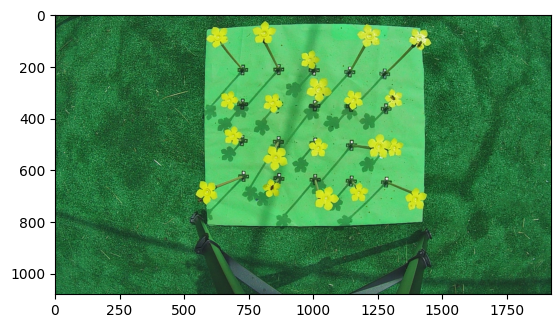

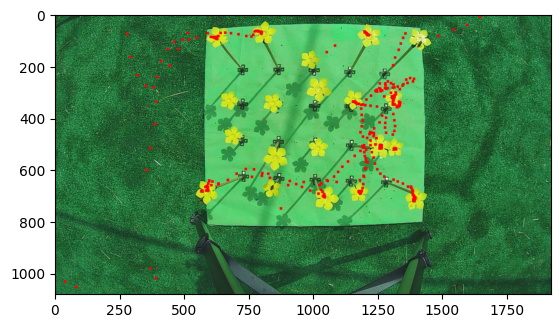

In [ ]:
drawcenters("/content/gdrive/Shareddrives/YOLObee_data/01_Data/video_2/frames_999/frame_0255.jpg")

We can see the movement of different bees. We can also see that some flowers are preferred over others.

Creation of Masks
---

In [ ]:
def createmask( filename , imagename, save_dir):      #Creation of masks for tracking with Trackmate
  image = Image.open( imagename )
  image1= np.array( image )
  size = image1.shape

  file = openfiles( filename )
  line = readlines( file )        #Change all the pixels in black
  for k in range(size[0]):
    for l in range(size[1]):
      image1[k][l][0:3] = 0

  while line:       #For each line, the algorithm calculates the center of the bounding boxes and draws a white square on each center
    coordinatescenterxy = coordinatescenter( line )
    coordinatecenterx = int(size[0] * float(coordinatescenterxy[0]))
    coordinatecentery = int(size[1] * float(coordinatescenterxy[1]))

    for i in range (10):
      for j in range (10):
        image1[coordinatecenterx-5+i][coordinatecentery-5+j][0:3] = 255
    line = file.readline()


  closefiles( file )
  iter_ = filename.split("_")         #number the frames
  iter = iter_[-1].split(".")
  name=filename.split(".")
  im = Image.fromarray(image1)
  filenameC = f"{save_dir}/{int(iter[0]):06d}_{name[0]}.jpg"
  im.save(filenameC)
  print(filenameC + " SAVED")


Main Code for Mask Creation
--

In [ ]:
i=0
folder="/content/gdrive/Shareddrives/YOLOBee_weights/runs/detect/video_2_training_06_x_2/labels/"

allfiles=os.listdir(folder)
allfiles.sort()
imax=how_many_files(folder)
save_dir="/content/gdrive/Shareddrives/YOLObee_data/01_Data/mask/video_2_training_06_x_2_counts"  #create a folder to save the masks
if not os.path.exists(save_dir):
  os.makedirs(save_dir)

while i<imax:   #Draw the masks and save them in the good folder
  filename=allfiles[i]
  if filename!="allcenters.txt":
    createmask(filename,"/content/gdrive/Shareddrives/YOLObee_data/01_Data/frames+labels/frame_0002.jpg", save_dir)
  i=i+1

/content/gdrive/Shareddrives/YOLObee_data/01_Data/mask/video_2_training_06_x_2_counts/000001_video_2_bees_extract_2_1.jpg SAVED
/content/gdrive/Shareddrives/YOLObee_data/01_Data/mask/video_2_training_06_x_2_counts/000010_video_2_bees_extract_2_10.jpg SAVED
/content/gdrive/Shareddrives/YOLObee_data/01_Data/mask/video_2_training_06_x_2_counts/000100_video_2_bees_extract_2_100.jpg SAVED
/content/gdrive/Shareddrives/YOLObee_data/01_Data/mask/video_2_training_06_x_2_counts/000101_video_2_bees_extract_2_101.jpg SAVED
/content/gdrive/Shareddrives/YOLObee_data/01_Data/mask/video_2_training_06_x_2_counts/000102_video_2_bees_extract_2_102.jpg SAVED
/content/gdrive/Shareddrives/YOLObee_data/01_Data/mask/video_2_training_06_x_2_counts/000103_video_2_bees_extract_2_103.jpg SAVED
/content/gdrive/Shareddrives/YOLObee_data/01_Data/mask/video_2_training_06_x_2_counts/000104_video_2_bees_extract_2_104.jpg SAVED
/content/gdrive/Shareddrives/YOLObee_data/01_Data/mask/video_2_training_06_x_2_counts/000105_